<a href="https://colab.research.google.com/github/OviRata/PMP-2024/blob/main/Lab12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
%pip install pymc

In [54]:
import pandas as pd
import pymc as pm
import numpy as np
import matplotlib.pyplot as plt
import arviz as az

data = pd.read_csv('date_promovare_examen.csv')


print(data.head())


print(data['Promovare'].value_counts())

   Ore_Studiu  Ore_Somn  Promovare
0        6.50      8.46          1
1        5.86      8.95          1
2        6.65      7.30          1
3        7.52      8.28          1
4        5.77      7.67          1
Promovare
1    250
0    250
Name: count, dtype: int64


In [55]:
X = np.array(data[['Ore_Studiu', 'Ore_Somn']])
y = np.array(data['Promovare'])


In [56]:

with pm.Model() as logistic_model:
    alpha = pm.Normal('alpha', mu=0, sigma=1)
    beta = pm.Normal('beta', mu=0, sigma=1, shape=2)


    mu = alpha + pm.math.dot(X, beta)
    p = pm.Deterministic('p', pm.math.sigmoid(mu))


    y_obs = pm.Bernoulli('y_obs', p=p, observed=y)


    trace = pm.sample(2000, tune=1000, target_accept=0.9, random_seed=42)

Output()

Output()

          mean     sd  hdi_2.5%  hdi_97.5%  mcse_mean  mcse_sd  ess_bulk  \
alpha   -7.756  0.631    -9.074     -6.592      0.016    0.011    1541.0   
beta[0]  1.463  0.201     1.101      1.900      0.005    0.004    1453.0   
beta[1]  0.329  0.163     0.003      0.643      0.005    0.003    1249.0   
p[0]     0.989  0.004     0.980      0.996      0.000    0.000    2669.0   
p[1]     0.976  0.008     0.960      0.990      0.000    0.000    2591.0   
...        ...    ...       ...        ...        ...      ...       ...   
p[495]   0.082  0.018     0.049      0.117      0.000    0.000    2381.0   
p[496]   0.014  0.008     0.002      0.029      0.000    0.000    1506.0   
p[497]   0.036  0.012     0.016      0.060      0.000    0.000    1753.0   
p[498]   0.011  0.005     0.003      0.020      0.000    0.000    1754.0   
p[499]   0.007  0.004     0.001      0.015      0.000    0.000    1564.0   

         ess_tail  r_hat  
alpha      1623.0    1.0  
beta[0]    1661.0    1.0  
beta[1

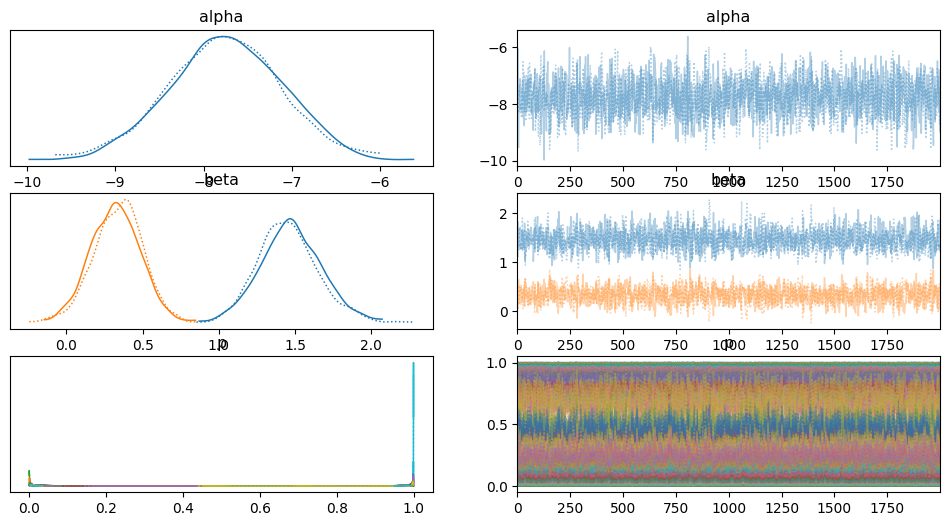

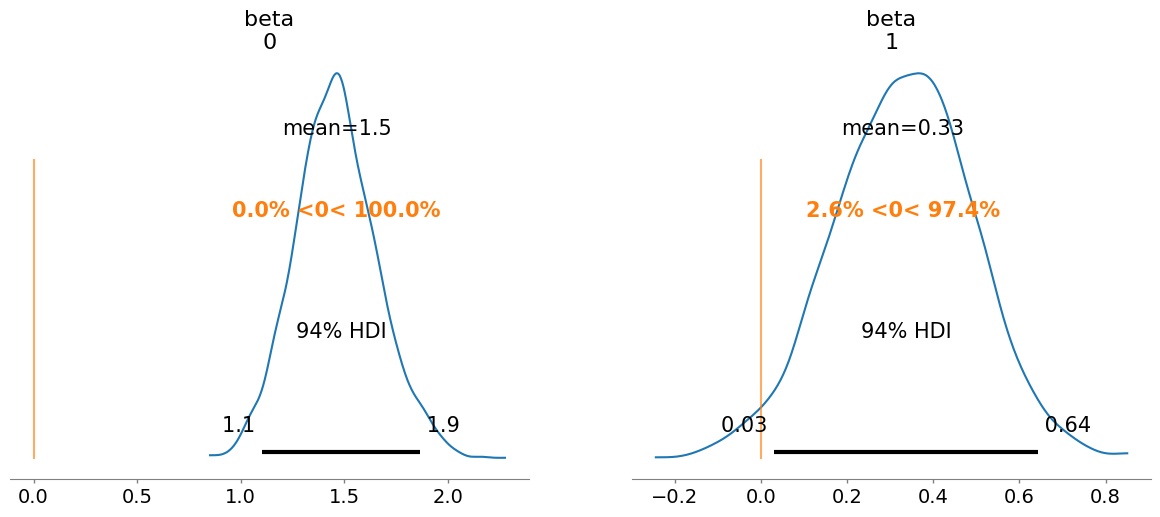

In [57]:

print(az.summary(trace, hdi_prob=0.95))


az.plot_trace(trace)
plt.show()


with logistic_model:
    pm.plot_posterior(trace, var_names=['beta'], ref_val=0)

In [58]:

beta_posterior = trace.posterior['beta']
print("Coeficientul mediue pt 'Ore_Studiu':", np.mean(beta_posterior[:, 0]))
print("Coeficientul mediue pt 'Ore_Somn':", np.mean(beta_posterior[:, 1]))
alpha_posterior = trace.posterior['alpha']
print("Coef. liber mediu: ", np.mean( alpha_posterior ));

Coeficientul mediue pt 'Ore_Studiu': <xarray.DataArray 'beta' ()> Size: 8B
array(0.95129978)
Coordinates:
    draw     int64 8B 0
Coeficientul mediue pt 'Ore_Somn': <xarray.DataArray 'beta' ()> Size: 8B
array(0.79259386)
Coordinates:
    draw     int64 8B 1
Coef. liber mediu:  <xarray.DataArray 'alpha' ()> Size: 8B
array(-7.7558213)


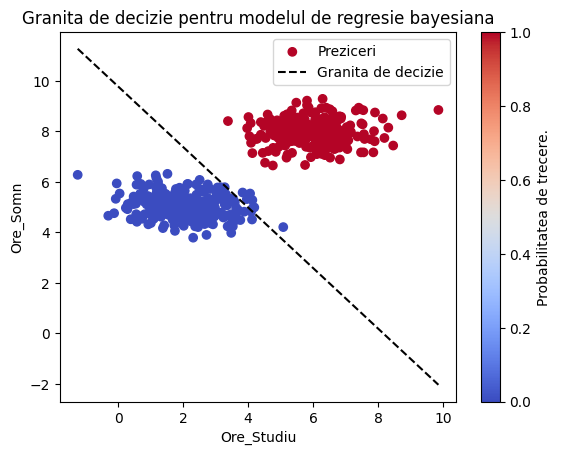

In [64]:

probs = []

beta_1 = 0.95129978
beta_2 = 0.79259386
alpha_mean = -7.7558213
for i in range( 500 ):
  probs.append( 1 / (1 + np.exp( -(  alpha_mean + np.dot([beta_1, beta_2], X[i].T)  )    )) )

probs = np.array(probs);

mean_probs = probs.mean(axis=0)



x_vals = np.linspace(X[:, 0].min(), X[:, 0].max(), 100)
y_vals = -(alpha_mean / beta_2) - (beta_1 / beta_2) * x_vals


plt.scatter(X[:, 0], X[:, 1], c = y > 0.5, cmap='coolwarm', label="Preziceri")
plt.plot(x_vals, y_vals, color='black', linestyle='--', label="Granita de decizie")

plt.xlabel("Ore_Studiu")
plt.ylabel("Ore_Somn")
plt.title("Granita de decizie pentru modelul de regresie bayesiana")
plt.colorbar(label="Probabilitatea de trecere.")
plt.legend()
plt.show()

Orele de studiu influenteaza mai mult promovabilitatea. Acest fapt poate fi dedus a priori din "experienta de viata", si a posteriori din faptul ca coeficientul pentru "Ore_Studiu" e mai mare decat coeficientul pentru "Ore_Somn".